# Homework 2

## FINM 36700 - 2024

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

## HBS Case

### *ProShares Hedge Replication ETF*

***

# 1. The ProShares ETF Product

**Section 1 is not graded**, and you do not need to submit your answers. But you are encouraged to think about them, and we will discuss them.

## 1. Alternative ETFs

Describe the two types of investments referenced by this term.

## 2. Hedge Funds.

a. Using just the information in the case, what are two measures by which hedge funds are an attractive investment?

b. What are the main benefits of investing in hedge funds via an ETF instead of directly?

## 3. The Benchmarks

a. Explain as simply as possible how HFRI, MLFM, MLFM-ES, and HDG differ in their construction and purpose.

b. How well does the Merrill Lynch Factor Model (MLFM) track the HFRI?

c. In which factor does the MLFM have the largest loading? (See a slide in Exhibit 1.)

d. What are the main concerns you have for how the MLFM attempts to replicate the HFRI?

## 4. The HDG Product

a. What does ProShares ETF, HDG, attempt to track? Is the tracking error small?

b. HDG is, by construction, delivering beta for investors. Isn't the point of hedge funds to generate alpha? Then why would HDG be valuable?

c. The fees of a typical hedge-fund are 2% on total assets plus 20% of excess returns if positive. HDG's expense ratio is roughly 1% on total assets. What would their respective net Sharpe Ratios be, assuming both have a gross excess returns of 10% and volatility of 20%?

***

# 2.  Analyzing the Data

Use the data found on Canvas, in <b>'proshares analysis data.xlsx'</b>. 

It has monthly data on financial indexes and ETFs from `Aug 2011` through `Sep 2024`.

## 1. 

For the series in the "hedge fund series" tab, report the following summary statistics:
* mean
* volatility
* Sharpe ratio

Annualize these statistics.

In [293]:
import pandas as pd

# load data
df = pd.read_excel('proshares_analysis_data.xlsx', sheet_name='hedge_fund_series')
df.rename(columns={df.columns[0]: 'date'}, inplace=True)
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.set_index('date', inplace=True)

# Summary statistics (annualized)
df_mean = df.mean() * 12
df_vol = df.std() * (12**0.5)
sharpe_ratios = df_mean / df_vol

# Format output
summary_df = pd.DataFrame({
    'Return': df_mean.values,
    'Volatility': df_vol.values,
    'Sharpe Ratio': sharpe_ratios.values
})
summary_df.set_index(df_mean.index, inplace=True)
summary_df.sort_values(by='Sharpe Ratio', ascending=False, inplace=True)
display(summary_df)

,Return,Volatility,Sharpe Ratio
HFRIFWI Index,0.048295,0.059476,0.812004
MLEIFCTR Index,0.036286,0.056136,0.646398
MLEIFCTX Index,0.034605,0.055980,0.618172
QAI US Equity,0.025653,0.050009,0.512971
HDG US Equity,0.024812,0.058408,0.424805


## 2.

For the series in the "hedge fund series" tab, calculate the following statistics related to tail-risk.
* Skewness
* Excess Kurtosis (in excess of 3)
* VaR (.05) - the fifth quantile of historic returns
* CVaR (.05) - the mean of the returns at or below the fifth quantile
* Maximum drawdown - include the dates of the max/min/recovery within the max drawdown period.

There is no need to annualize any of these statistics.

In [294]:
import quantstats.stats as qs

In [295]:
# Define function
#import quantstats as qs
test_df = df[df.index < '2024-01-01']
def calc_return_metrics(df):
    # general drawdown metrics
    drawdown_df = qs.to_drawdown_series(df)
    drawdown_details_df = qs.drawdown_details(drawdown_df)
    max_drawdown_info = pd.DataFrame(columns = df.columns)
    index_labels = ['start', 'valley', 'end', 'days', 'max drawdown', '99% max drawdown']
    
    for i in df.columns:
        series_df = drawdown_details_df.filter(regex = i)
        df_sorted = series_df.sort_values(by=series_df.columns[4], ascending=True, na_position='last')
        max_dd_series = df_sorted.iloc[0]
        max_dd_series.index = index_labels
        max_drawdown_info[i] = max_dd_series

    # format max drawdown df
    max_drawdown_info = max_drawdown_info.T
    clean_dd = max_drawdown_info[['max drawdown', 'start', 'valley', 'days']]
    clean_dd.rename(columns={'max drawdown' : 'Max Drawdown', 'start': 'Peak', 'valley': 'Trough', 'days': 'Duration'}, inplace=True)
    
    for i in df.columns:
        series_df = df.filter(regex = i)
        
    # assemble metrics
    sum_df = pd.DataFrame({
        'Skewness': qs.skew(df).values,
        'Excess Kurtosis': qs.kurtosis(df).values - 3, # kurtosis in excess of 3
        'VaR (0.05)': qs.var(df),
        'cVaR (0.05)': qs.conditional_value_at_risk(df)
    })
    sum_df.set_index(df.columns, inplace=True)
    
    # add drawdown metrics
    sum_df_full = pd.concat([sum_df, clean_dd], axis = 1)
    return sum_df_full

summary_df = calc_return_metrics(test_df).round(3)
display(summary_df)
    

C:\Users\bwick\AppData\Local\Temp\ipykernel_22084\3386745930.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_dd.rename(columns={'max drawdown' : 'Max Drawdown', 'start': 'Peak', 'valley': 'Trough', 'days': 'Duration'}, inplace=True)


,Skewness,Excess Kurtosis,VaR (0.05),cVaR (0.05),Max Drawdown,Peak,Trough,Duration
HFRIFWI Index,-0.931,2.558,-0.025,-0.025,-11.547316,2020-01-31,2020-03-31,183.0
MLEIFCTR Index,-0.242,-1.467,-0.024,-0.024,-12.430154,2021-07-31,2022-09-30,884
MLEIFCTX Index,-0.229,-1.500,-0.024,-0.024,-12.438783,2021-07-31,2022-09-30,884.0
HDG US Equity,-0.236,-1.320,-0.026,-0.026,-14.072004,2021-07-31,2022-09-30,884.0
QAI US Equity,-0.391,-1.437,-0.022,-0.022,-13.771619,2021-07-31,2022-09-30,884.0


## 3. 

For the series in the "hedge fund series" tab, run a regression of each against SPY (found in the "merrill factors" tab.) Include an intercept. Report the following regression-based statistics:
* Market Beta
* Treynor Ratio
* Information ratio

Annualize these three statistics as appropriate.

In [296]:
# Add SPY to df (hedge fund returns)
# Import and clean SPY
mer = pd.read_excel('proshares_analysis_data.xlsx', sheet_name='merrill_factors')
mer.rename(columns={mer.columns[0]: 'date'}, inplace=True)
mer['date'] = pd.to_datetime(mer['date'], format='%Y-%m-%d')
mer.set_index('date', inplace=True)

# Add to hedge fund returns
reg_df = pd.concat([df, mer[['SPY US Equity']]], axis=1)
reg_df.head()

## Fit regressions
# import module
from sklearn.linear_model import LinearRegression

# model set-up
model = LinearRegression()
coefs = []
mean_rets = []
intercepts = []
sd_residuals = []
model_fit = []

# for loop to execute model
for i in range(5):
    X = reg_df[['SPY US Equity']]  # Independent variable
    y = reg_df.iloc[:, i]  # Dependent variable (i-th column)

    # Fit the model
    model.fit(X, y)
    tmp_y_pred = model.predict(X)
    tmp_residuals = y - tmp_y_pred
    tmp_residuals_std = tmp_residuals.std()
    tmp_mean_return = y.mean(axis=0) 
    
    # Store results
    mean_rets.append(tmp_mean_return * 12) # annualized 
    coefs.append(model.coef_[0])
    intercepts.append(model.intercept_ * 12) # annualized
    sd_residuals.append(tmp_residuals_std * 12) # annualized
    model_fit.append(model.score(X, y))
    
# Organize statistics
data = pd.DataFrame({
    'Mean Return': mean_rets, 
    'Market Beta': coefs,
    'Alpha': intercepts,
    'SD Residuals': sd_residuals,
    'R-Squared': model_fit
})
mean_spy_ret = reg_df['SPY US Equity'].mean() * 12
data.set_index(summary_df.index, inplace=True)
data['Treynor Ratio'] = data['Mean Return'] / data['Market Beta']
data['Information Ratio'] = data['Alpha'] / data['SD Residuals'] # in-class definition
#data['Information Ratio'] = data['Mean Return'] - mean_spy_ret / data['SD Residuals'] # online defintion
clean_data = data[['Alpha', 'Market Beta', 'R-Squared', 'Treynor Ratio', 'Information Ratio']]
display(clean_data.round(4))

,Alpha,Market Beta,R-Squared,Treynor Ratio,Information Ratio
HFRIFWI Index,-0.0011,0.3461,0.7115,0.1395,-0.0103
MLEIFCTR Index,-0.0128,0.3434,0.7861,0.1057,-0.1419
MLEIFCTX Index,-0.0143,0.3422,0.7849,0.1011,-0.1586
HDG US Equity,-0.0255,0.3521,0.7632,0.0705,-0.2587
QAI US Equity,-0.0170,0.2984,0.7478,0.0860,-0.1950


## 4. 

Discuss the previous statistics, and what they tell us about...

* the differences between SPY and the hedge-fund series?
* which performs better between HDG and QAI.
* whether HDG and the ML series capture the most notable properties of HFRI.

## 5. 

Report the correlation matrix for these assets.
* Show the correlations as a heat map.
* Which series have the highest and lowest correlations?

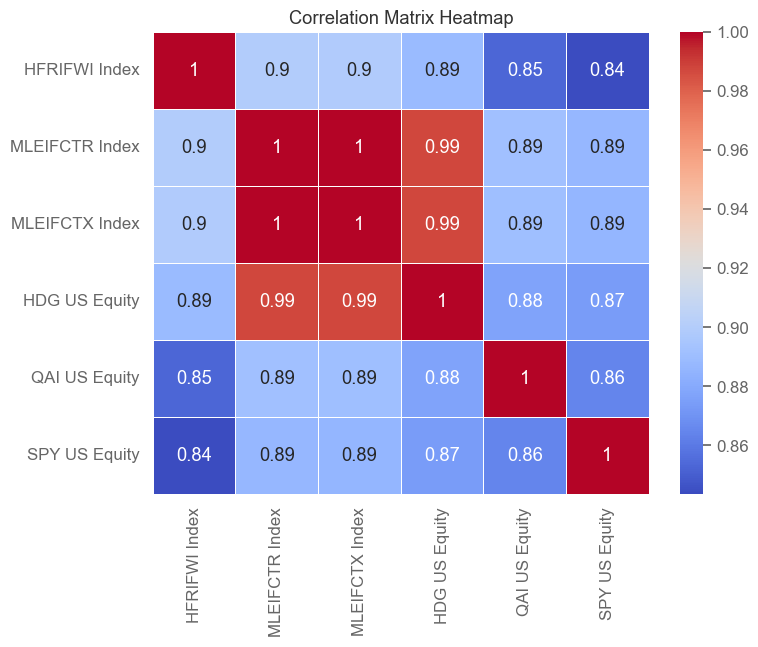

The highest correlation is between MLEIFCTR Index and MLEIFCTX Index with a correlation of 1.00.
The lowest correlation is between HFRIFWI Index and SPY US Equity with a correlation of 0.84.


In [297]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = reg_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Highest, lowest correlations
correlations = corr_matrix.stack().reset_index()
correlations.columns = ['Variable 1', 'Variable 2', 'Correlation']
correlations = correlations[correlations['Variable 1'] != correlations['Variable 2']] # exclude self-correlations of 1

max_corr = correlations.loc[correlations['Correlation'].idxmax()]
min_corr = correlations.loc[correlations['Correlation'].idxmin()]

# Print the results
print(f"The highest correlation is between {max_corr['Variable 1']} and {max_corr['Variable 2']} with a correlation of {max_corr['Correlation']:.2f}.")
print(f"The lowest correlation is between {min_corr['Variable 1']} and {min_corr['Variable 2']} with a correlation of {min_corr['Correlation']:.2f}.")

## 6.

Replicate HFRI with the six factors listed on the "merrill factors" tab. Include a constant, and run the unrestricted regression,

$\newcommand{\hfri}{\text{hfri}}$
$\newcommand{\merr}{\text{merr}}$

$$\begin{align}
r^{\hfri}_{t} &= \alpha^{\merr} + x_{t}^{\merr}\beta^{\merr} + \epsilon_{t}^{\merr}\\[5pt]
\hat{r}^{\hfri}_{t} &= \hat{\alpha}^{\merr} + x_{t}^{\merr}\hat{\beta}^{\merr}
\end{align}$$

Note that the second equation is just our notation for the fitted replication.

a. Report the intercept and betas.
b. Are the betas realistic position sizes, or do they require huge long-short positions?
c. Report the R-squared.
d. Report the volatility of $\epsilon^{\merr}$, the tracking error.

In [298]:
# Create data
hfri_rep = pd.concat([mer, df[['HFRIFWI Index']]], axis=1)

# Fit model
model = LinearRegression()
covariates = hfri_rep.drop(columns=['HFRIFWI Index'])
model.fit(covariates, hfri_rep[['HFRIFWI Index']])

# Summarize model output
coefficients = pd.DataFrame({
    'Feature': covariates.columns,
    'Coefficient': model.coef_[0]
})
print(coefficients)
print("Intercept:", model.intercept_)
r_squared = model.score(covariates, hfri_rep[['HFRIFWI Index']])
print("R-squared:", round(r_squared, 3))


         Feature  Coefficient
0  SPY US Equity     0.036483
1   USGG3M Index     0.146336
2  EEM US Equity     0.081611
3  EFA US Equity     0.084638
4  EUO US Equity     0.028806
5  IWM US Equity     0.145111
Intercept: [0.00123534]
R-squared: 0.84


## 7.

Let's examine the replication out-of-sample (OOS).

Starting with $t = 61$ month of the sample, do the following:

* Use the previous 60 months of data to estimate the regression equation. 
This gives time-t estimates of the regression parameters, $\tilde{\alpha}^{\merr}_{t}$ and $\tilde{\beta}^{\merr}_{t}$.

* Use the estimated regression parameters, along with the time-t regressor values, $x^{\merr}_{t}$, calculate the time-t replication value that is, with respect to the regression estimate, built "out-of-sample" (OOS).

$$\hat{r}^{\hfri}_{t} \equiv \tilde{\alpha}^{\merr} + (x_{t}^{\merr})'\tilde{\beta}^{\merr}$$

* Step forward to $t = 62$, and now use $t = 2$ through $t = 61$ for the estimation. Re-run the steps above, and continue this process throughout the data series. Thus, we are running a rolling, 60-month regression for each point-in-time.

How well does the out-of-sample replication perform with respect to the target?

In [299]:
# Code similar to 2023 assignment, more efficient than what I could come up with
from collections import defaultdict

hfri = hfri_rep[["HFRIFWI Index"]].copy()

summary = defaultdict(list)

for idx in range(60, len(hfri), 1):
    # Variables for first 60 months, rolling window
    X = hfri_rep.drop(columns=['HFRIFWI Index']).iloc[idx - 60 : idx].copy()
    y = hfri.iloc[idx - 60 : idx, 0].copy()

    oos_y = hfri.iloc[idx, 0]
    oos_X = hfri_rep.drop(columns=['HFRIFWI Index']).iloc[idx, :].copy()

    # Calculate the regression coefficients
    model = LinearRegression()
    model.fit(X, y)

    # 
    for jdx, coeff in enumerate(model.coef_):
        summary[f'coef_{jdx}'].append(coeff)

    # Get predicted y by multiplying the coefficients by the X values and adding the intercept
    y_pred = model.intercept_ + (model.coef_ @ oos_X)

    summary["Replicated"].append(y_pred)
    summary["Actual"].append(oos_y)

summary = pd.DataFrame(summary, index=hfri.index[60:])
summary.columns.values[:6] = hfri_rep.columns[:6]
summary.head()

,SPY US Equity,USGG3M Index,EEM US Equity,EFA US Equity,EUO US Equity,IWM US Equity,Replicated,Actual
date,,,,,,,,
2016-08-31,0.088884,10.176949,0.049402,0.120781,0.023245,0.073649,0.004966,0.004274
2016-09-30,0.094174,8.444434,0.050045,0.111930,0.018838,0.069655,0.005001,0.006468
2016-10-31,0.096728,8.585762,0.044211,0.114455,0.021629,0.065134,-0.004449,-0.005947
2016-11-30,0.108391,4.813249,0.059997,0.092413,0.019464,0.076252,0.011651,0.007660
2016-12-31,0.107338,0.326931,0.066092,0.088911,0.021986,0.071585,0.007650,0.010063


OOS-R-Squared: 80.43%
An OOS-R-squared of 80.43% means this model was very good, especially for a linear model with highly-correlated inputs.


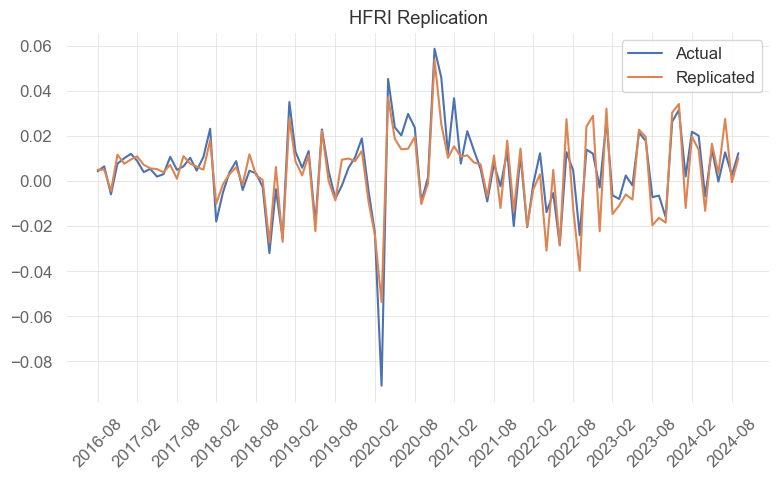

In [300]:
# Visualize results
# Calculate OOS R-Squared
oos_rsquared = (
        1 - (summary["Actual"] - summary["Replicated"]).var() / summary["Actual"].var()
)
print(f"OOS-R-Squared: {oos_rsquared:.2%}")
print(f"An OOS-R-squared of {oos_rsquared:.2%} means this model was very good, especially for a linear model with highly-correlated inputs.")

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(summary.index, summary["Actual"], label="Actual")
ax.plot(summary.index, summary["Replicated"], label="Replicated")
ax.grid(True)
ax.legend()

# Make ticklabels every 6 months and label them as %yyy-%mm
ax.set_xticks(summary.index[::6])
ax.set_xticklabels(
    [f"{i.year}-{i.month:02d}" for i in summary.index[::6]],
    rotation=45,
    horizontalalignment="center",
)

ax.set_title("HFRI Replication")
fig.tight_layout()

## 8.

We estimated the replications using an intercept. Try the full-sample estimation, but this time without an intercept.

$$\begin{align}
r^{\hfri}_{t} &= \alpha^{merr} + x_{t}^{\merr}\beta^{\merr} + \epsilon_{t}^{\merr}\\[5pt]
\check{r}^{\hfri}_{t} &= \check{\alpha}^{\merr} + x_{t}^{\merr}\check{\beta}^{\merr}
\end{align}$$

Report

* the regression beta. How does it compare to the estimated beta with an intercept, $\hat{\beta}^{\merr}$?

* the mean of the fitted value, $\check{r}^{\hfri}_{t}$. How does it compare to the mean of the HFRI?

* the correlations of the fitted values, $\check{r}^{\hfri}_{t}$ to the HFRI. How does the correlation compare to that of the fitted values with an intercept, $\hat{r}^{\hfri}_{t}$

Do you think Merrill and ProShares fit their replicators with an intercept or not?

In [301]:
import numpy as np
# Fit models
covariates = hfri_rep.drop(columns=['HFRIFWI Index'])
model_no_int = LinearRegression(fit_intercept=False)
model_no_int.fit(covariates, hfri_rep[['HFRIFWI Index']])
model_with_int = LinearRegression()
model_with_int.fit(covariates, hfri_rep[['HFRIFWI Index']])

# Summarize model output, comparisons
coef_comp = pd.DataFrame({
    'Feature': covariates.columns,
    'Coef (No Intercept)': model_no_int.coef_[0],
    'Coef (With Intercept)': model_with_int.coef_[0]
})
display(coef_comp)
r_squared_w = model_with_int.score(covariates, hfri_rep[['HFRIFWI Index']])
r_squared_wo = model_no_int.score(covariates, hfri_rep[['HFRIFWI Index']])
print("R-squared w/ Intercept:", round(r_squared_w, 3), " R-squared w/o Intercept:", round(r_squared_wo, 3))

# Compare means of fitted values
# Calculate the fitted mean
fitted_mean_w = (model_with_int.intercept_ + model_with_int.coef_ @ covariates.mean()) * 12
fitted_mean_wo = (model_with_int.coef_ @ covariates.mean()) * 12
hfri_mean = hfri.mean()  * 12

print(f'HFRI Mean: {hfri_mean[0]:.2%}')
print(f'Fitted Mean: {fitted_mean_w[0]:.2%}')
print(f'Fitted Mean (no intercept): {fitted_mean_wo[0]:.2%}')

# Compare correlations of fitted values
pred_no_int = model_no_int.predict(covariates)
pred_with_int = model_with_int.predict(covariates)
corr_no_int = round(np.corrcoef(hfri_rep['HFRIFWI Index'], pred_no_int[:, 0])[0, 1], 3)
corr_with_int = round(np.corrcoef(hfri_rep['HFRIFWI Index'], pred_with_int[:, 0])[0, 1], 3)
print(f'Correlation without intercept: {corr_no_int}')
print(f'Correlation with intercept: {corr_with_int}')

,Feature,Coef (No Intercept),Coef (With Intercept)
0,SPY US Equity,0.050667,0.036483
1,USGG3M Index,0.499336,0.146336
2,EEM US Equity,0.080866,0.081611
3,EFA US Equity,0.079146,0.084638
4,EUO US Equity,0.031373,0.028806
5,IWM US Equity,0.142651,0.145111


R-squared w/ Intercept: 0.84  R-squared w/o Intercept: 0.837
HFRI Mean: 4.83%
Fitted Mean: 4.83%
Fitted Mean (no intercept): 3.35%
Correlation without intercept: 0.916
Correlation with intercept: 0.916


C:\Users\bwick\AppData\Local\Temp\ipykernel_22084\3664761215.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'HFRI Mean: {hfri_mean[0]:.2%}')


***

# 3.  Extensions
<i>This section is not graded, and you do not need to submit it. Still, we may discuss it in class, in which case, you would be expected to know it.

## 1. 

Merrill constrains the weights of each asset in its replication regression of HFRI. Try constraining your weights by re-doing 2.6.

* Use Non-Negative Least Squares (NNLS) instead of OLS.
* Go further by using a Generalized Linear Model to put separate interval constraints on each beta, rather than simply constraining them to be non-negative.

#### Hints
* Try using LinearRegression in scikit-learn with the parameter `positive=True`. 
* Try using GLM in statsmodels.

## 2. 

Let's decompose a few other targets to see if they behave as their name suggests.

* Regress HEFA on the same style factors used to decompose HFRI. Does HEFA appear to be a currency-hedged version of EFA?

* Decompose TRVCI with the same style factors used to decompose HFRI. The TRVCI Index tracks venture capital funds--in terms of our styles, what best describes venture capital?

* TAIL is an ETF that tracks SPY, but that also buys put options to protect against market downturns. Calculate the statistics in questions 2.1-2.3 for TAIL. Does it seem to behave as indicated by this description? That is, does it have high correlation to SPY while delivering lower tail risk?

## 3. 

The ProShares case introduces Levered ETFs. ProShares made much of its name originally through levered, or "geared" ETFs.

Explain conceptually why Levered ETFs may track their index well for a given day but diverge over time. How is this exacerbated in volatile periods like 2008?

## 4.

Analyze SPXU and UPRO relative to SPY.
- SPXU is ProShares -3x SPX ETF.
- UPRO is ProShres +3x SPX ETF.

Questions:
* Analyze them with the statistics from 2.1-2.3. 

* Do these two ETFs seem to live up to their names?

* Plot the cumulative returns of both these ETFs along with SPY.

* What do you conclude about levered ETFs?

***